Reproduce results from attempt 3 (20180910)

In [8]:
%matplotlib inline
%run batch_SG_analysis.py
from os import listdir

20180910_A2_7.nd2:


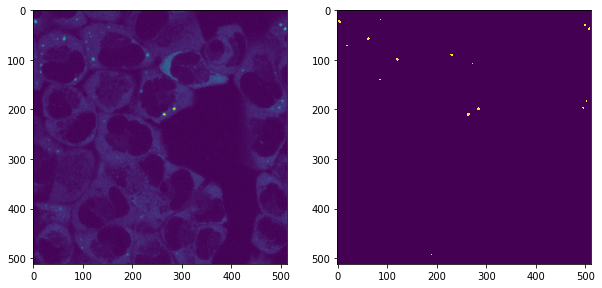

found 17
found 1 loaded particles. 
 Average Ratio: 0.9863874345549738
20180910_A2_15.nd2:


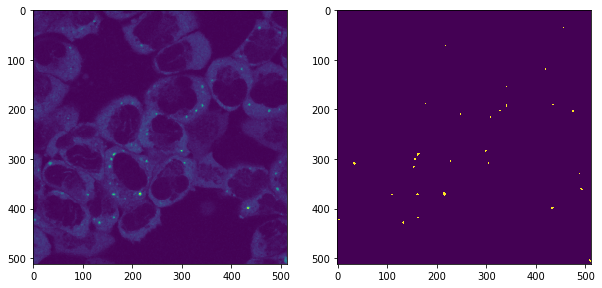

found 32
found 9 loaded particles. 
 Average Ratio: 1.391557730145633
20180910_A2_17.nd2:


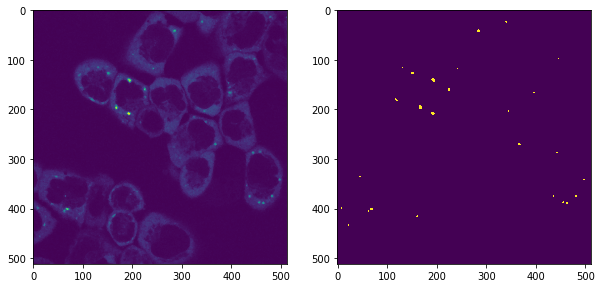

found 29
found 11 loaded particles. 
 Average Ratio: 1.3520743568712439
20180910_A2_16.nd2:


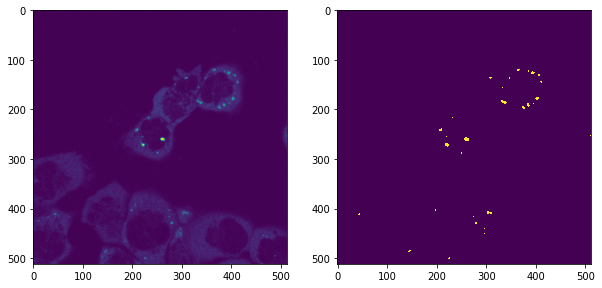

found 34
found 22 loaded particles. 
 Average Ratio: 1.4150803824500742
20180910_A2_20.nd2:


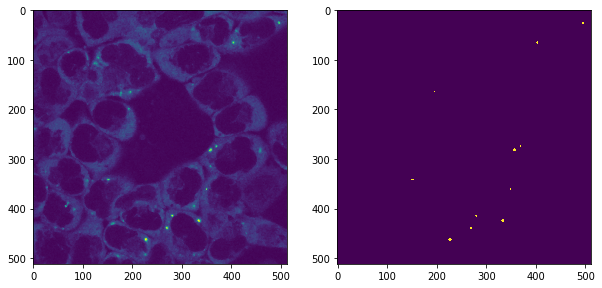

found 13
found 3 loaded particles. 
 Average Ratio: 1.3047102004774223
20180910_A2_18.nd2:


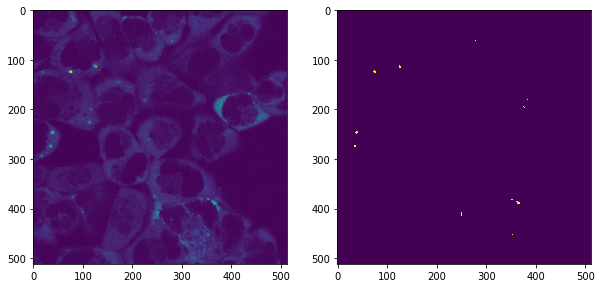

found 12
found 3 loaded particles. 
 Average Ratio: 1.1268527170909353
20180910_A2_24.nd2:


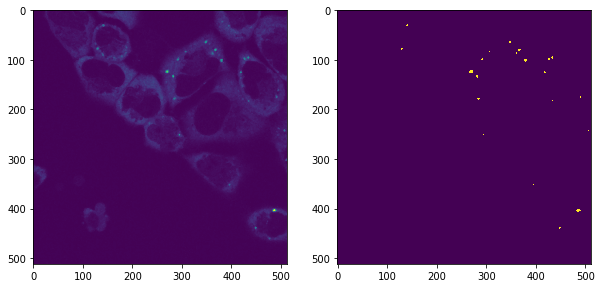

found 23
found 2 loaded particles. 
 Average Ratio: 1.5828385604856192
20180910_A2_25.nd2:


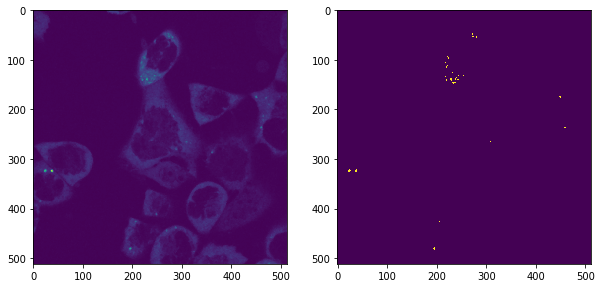

found 28
found 19 loaded particles. 
 Average Ratio: 1.1736195590577083
20180910_A2_19.nd2:


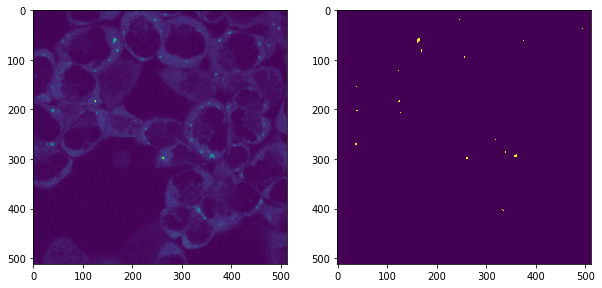

found 21
found 8 loaded particles. 
 Average Ratio: 1.2942737862585802
20180910_A2_9.nd2:


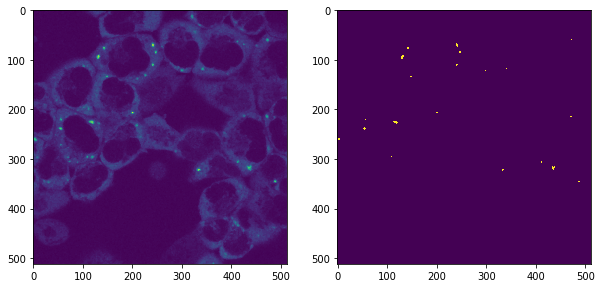

found 22
found 5 loaded particles. 
 Average Ratio: 1.3118944562127088
20180910_A2_8.nd2:


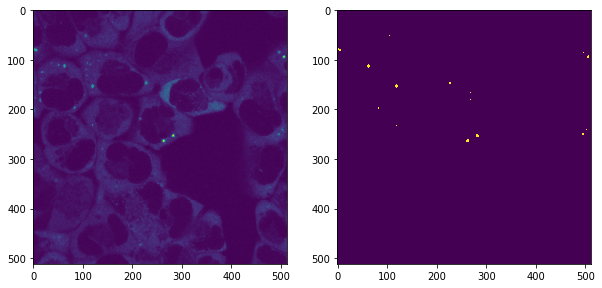

found 18
found 4 loaded particles. 
 Average Ratio: 1.1416624798059147


In [23]:
def process_dir(path_to_dir, RG_background, halo_threshold):
    all_ratios = []
    for filename in listdir(path_to_dir):
        if filename == ".DS_Store": continue
        finder = SgFinder(path_to_dir+"/"+filename,RG_background)
        finder.median_filter(3)
        print(filename+":")
        finder.setHaloThreshold(threshold=halo_threshold)
        finder.dilate_and_ratio(iterations=5)
        all_ratios = all_ratios + finder.ratios
    return all_ratios

pos_ratios = process_dir("/Users/colinrathbun/Research/imaging/20180910/singles_pos/", 35, 350)

In [24]:
print(len(pos_ratios))
print(np.mean(pos_ratios))

87
1.3075223371434437


20180910_neg1_1.nd2:


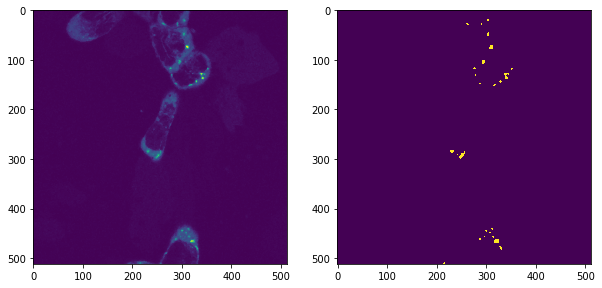

found 27
found 16 loaded particles. 
 Average Ratio: 1.2097460782819014
20180910_neg1_3.nd2:


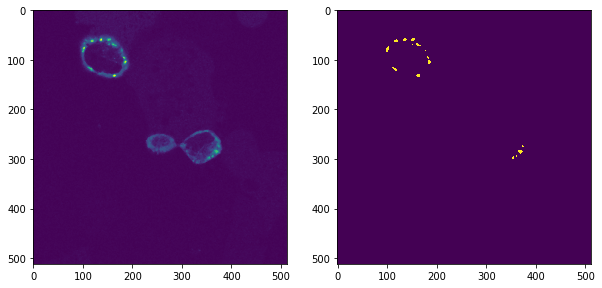

found 16
found 12 loaded particles. 
 Average Ratio: 1.2098556640612002
20180910_neg1_5.nd2:


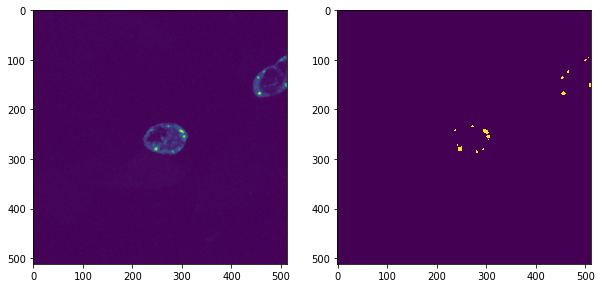

found 15
found 14 loaded particles. 
 Average Ratio: 1.1915882759025176
20180910_neg1_4.nd2:


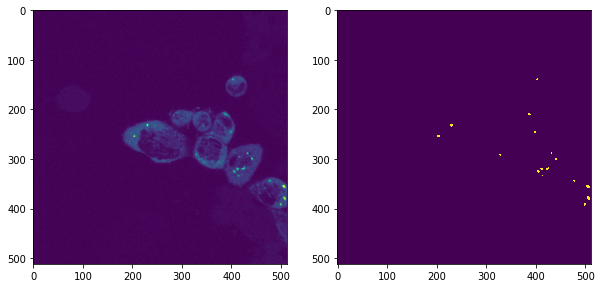

found 16
found 8 loaded particles. 
 Average Ratio: 1.2383516341056457


In [37]:
neg_ratios = process_dir("/Users/colinrathbun/Research/imaging/20180910/singles_neg/", 35, 350)

In [26]:
print(len(neg_ratios))
print(np.mean(neg_ratios))

50
1.2092650831345049


In [27]:
d = {'condition':[],
    'ratio':[]}
for pt in pos_ratios:
    d['condition'].append('pos rna')
    d['ratio'].append(pt)

for pt in neg_ratios:
    d['condition'].append('neg rna')
    d['ratio'].append(pt)

In [28]:
import pandas as pd
df = pd.DataFrame(d)

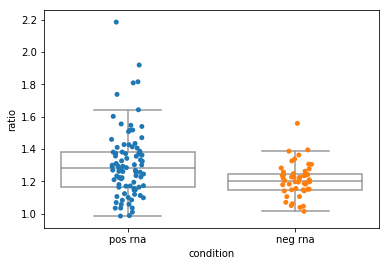

In [31]:
import seaborn as sn
ax = sn.stripplot(data=df,y='ratio',x='condition',jitter=True)
sn.boxplot(data=df,y='ratio',x='condition',ax=ax,color='w',fliersize=0)

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
def anova(df, y='ratio', x='condition'):
    mod_string = '{} ~ {}'.format(y,x)
    mod = ols(mod_string,
                    data=df).fit()

    aov_table = sm.stats.anova_lm(mod, typ=2)
    return aov_table

In [34]:
anova(df)

,sum_sq,df,F,PR(>F)
condition,0.306548,1.0,9.605741,0.002361
Residual,4.308249,135.0,NaN,NaN


20180910_A3_19.nd2:


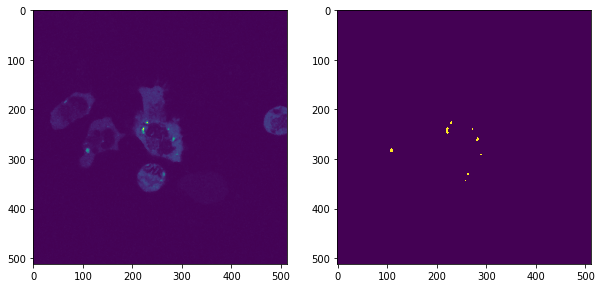

found 8
found 5 loaded particles. 
 Average Ratio: 1.631424605693542
20180910_A3_18.nd2:


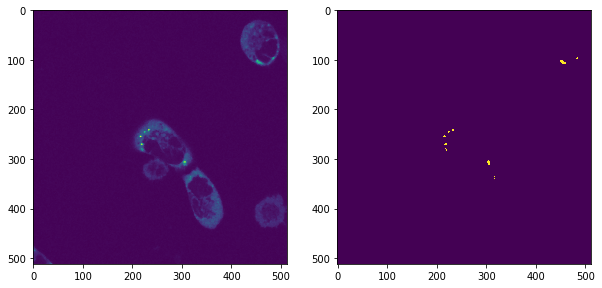

found 10
found 7 loaded particles. 
 Average Ratio: 1.2826704098660124
20180910_A3_5.nd2:


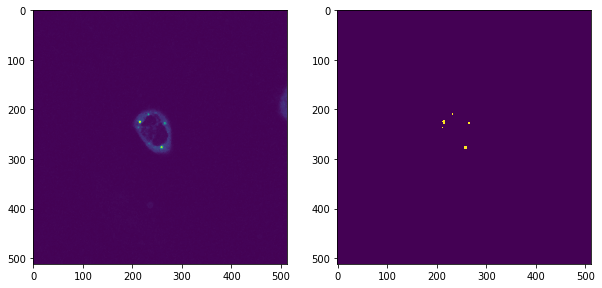

found 5
found 4 loaded particles. 
 Average Ratio: 1.7879530734056521
20180910_A3_9.nd2:


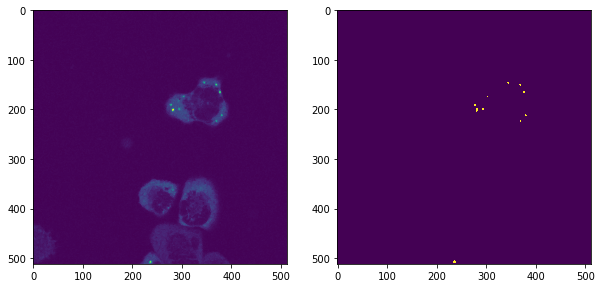

found 10
found 9 loaded particles. 
 Average Ratio: 1.3227818317805697
20180910_A3_17.nd2:


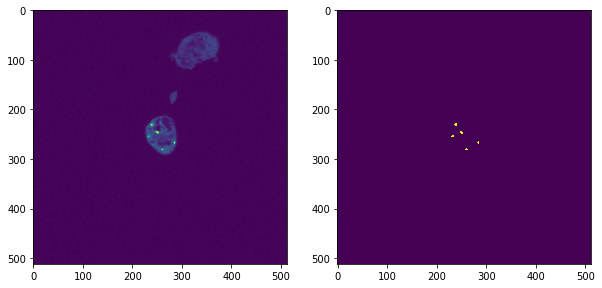

found 5
found 4 loaded particles. 
 Average Ratio: 1.533945624478544
20180910_A3_15.nd2:


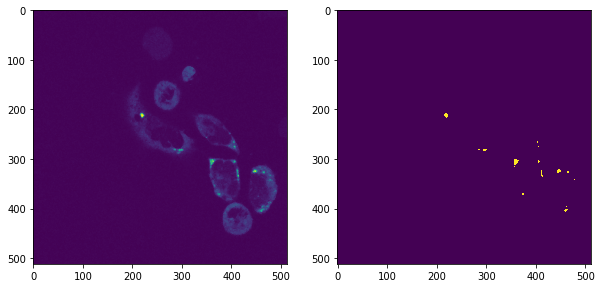

found 15
found 9 loaded particles. 
 Average Ratio: 1.48822033024907
20180910_A3_14.nd2:


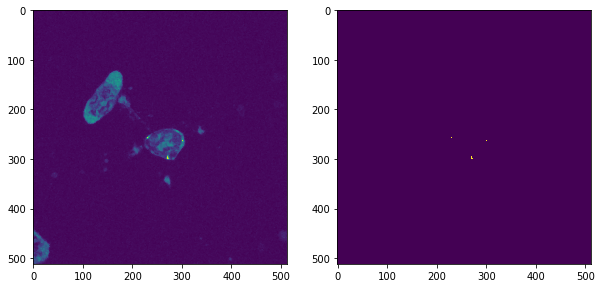

found 3
found 2 loaded particles. 
 Average Ratio: 1.6011379007321076
20180910_A3_10.nd2:


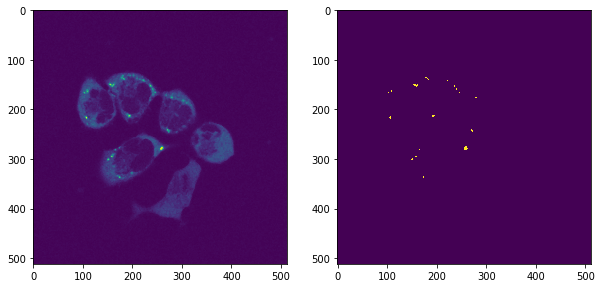

found 19
found 2 loaded particles. 
 Average Ratio: 1.3424242424242423
20180910_A3_11.nd2:


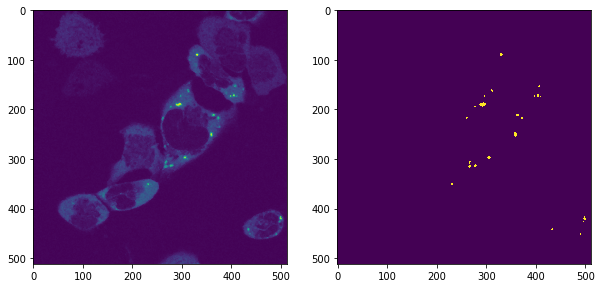

found 23
found 22 loaded particles. 
 Average Ratio: 1.367882045263614
20180910_A3_12.nd2:


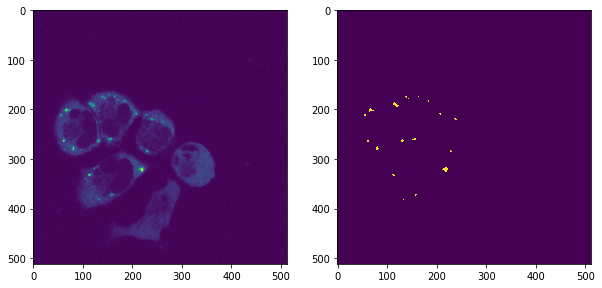

found 19
found 2 loaded particles. 
 Average Ratio: 1.273279175401817


In [36]:
pos3_ratios = process_dir("/Users/colinrathbun/Research/imaging/20180910/singles_pos3/", 35, 350)

In [38]:
print(len(pos3_ratios))
print(np.mean(pos3_ratios))

66
1.428022996670442


In [39]:
d = {'plate':[],
    'condition':[],
    'ratio':[]}
for pt in pos_ratios:
    d['plate'].append('2')
    d['condition'].append('pos rna')
    d['ratio'].append(pt)

for pt in neg_ratios:
    d['plate'].append('neg')
    d['condition'].append('neg rna')
    d['ratio'].append(pt)

for pt in pos3_ratios:
    d['plate'].append('3')
    d['condition'].append('pos rna')
    d['ratio'].append(pt)

In [40]:
df = pd.DataFrame(d)

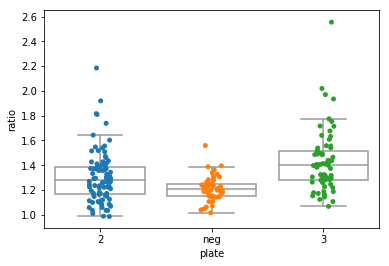

In [41]:
ax = sn.stripplot(data=df,y='ratio',x='plate',jitter=True)
sn.boxplot(data=df,y='ratio',x='plate',ax=ax,color='w',fliersize=0)

In [44]:
anova(df[df['plate']!='2'])

,sum_sq,df,F,PR(>F)
condition,1.361393,1.0,34.170058,4.893406e-08
Residual,4.541953,114.0,NaN,NaN


Awesome. Looks like this works well. I think the threshold should be constant among conditions to be safe (as long as the lasers were all set the same??). I should implement the plotting and stats somehow into the class.